# Exam 

## Quiz 2
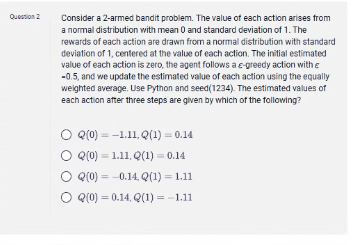

In [1]:
import numpy as np

np.random.seed(1234)

def optimal_action(qvalue, eps):
    nactions = qvalue.shape[0]
    action_hat = np.where(qvalue == np.max(qvalue))
    if np.random.rand() <= eps:
        randnum = np.random.rand()
        for aa in range(nactions):
            if randnum < (aa + 1) / nactions:
                break
    elif action_hat[0].shape[0] > 1:
        randnum = np.random.rand()
        for aa in range(action_hat[0].shape[0]):
            if randnum < (aa + 1) / action_hat[0].shape[0]:
                break
        aa = action_hat[0][aa]
    else:
        aa = np.argmax(qvalue)
    return aa

def reward_update(action, reward, qvalue_old, alpha):
    qvalue_new = qvalue_old.copy()
    qvalue_new[action] = qvalue_old[action] + alpha * (reward - qvalue_old[action])
    return qvalue_new

# Parameters
NK = 2
EPSILON = 0.5

# Generate true action values
NMEANS = np.random.normal(loc=0.0, scale=1.0, size=NK)
print("NMEANS:", NMEANS)

# Initialize estimates and counts
qvalue = np.zeros(NK)
nchoices = np.zeros(NK, dtype=int)
print("Initial Q:", qvalue.copy())
print("Initial nchoices:", nchoices.copy())
print()

# Run 3 steps
for t in range(3):
    aa = optimal_action(qvalue, EPSILON)
    # increment count BEFORE using it for the sample-average update
    nchoices[aa] += 1
    reward = np.random.normal(loc=NMEANS[aa], scale=1.0)
    alpha = 1.0 / nchoices[aa]
    qvalue = reward_update(aa, reward, qvalue, alpha)
    print(f"Step {t+1}: chosen={aa}, reward={reward:.12f}, nchoices={nchoices.copy()}, Q={qvalue.copy()}")

print()
print("Final estimated Q-values after 3 steps:")
for i, q in enumerate(qvalue):
    print(f"Q({i}) = {q:.12f}")


NMEANS: [ 0.47143516 -1.19097569]
Initial Q: [0. 0.]
Initial nchoices: [0 0]

Step 1: chosen=1, reward=-1.911564428071, nchoices=[0 1], Q=[ 0.         -1.91156443]
Step 2: chosen=1, reward=-0.303812754399, nchoices=[0 2], Q=[ 0.         -1.10768859]
Step 3: chosen=0, reward=0.140828343791, nchoices=[1 2], Q=[ 0.14082834 -1.10768859]

Final estimated Q-values after 3 steps:
Q(0) = 0.140828343791
Q(1) = -1.107688591235


## Quiz 3

In [2]:
import numpy as np

Q = np.array([-2.34, -0.22, 1.56, -2.74, 0.3])
epsilon = 0.5
n = len(Q)

# Find greedy set (handles ties just in case)
greedy_indices = np.flatnonzero(Q == Q.max())

# Build probability vector
probs = np.full(n, epsilon / n)  # exploration mass
# Exploitation mass goes to greedy arms (split evenly if tie)
probs[greedy_indices] += (1 - epsilon) / len(greedy_indices)

print("Q:", Q.tolist())
print("epsilon:", epsilon)
print("Greedy indices:", greedy_indices.tolist())
print("Policy probabilities:", probs.tolist())

# Optional: draw one action from the ε-greedy policy
action = np.random.choice(np.arange(n), p=probs)
print("Sampled action:", int(action))


Q: [-2.34, -0.22, 1.56, -2.74, 0.3]
epsilon: 0.5
Greedy indices: [2]
Policy probabilities: [0.1, 0.1, 0.6, 0.1, 0.1]
Sampled action: 2


In [9]:
import numpy as np

np.random.seed(1234)

def optimal_action(qvalue, eps):
    nactions = qvalue.shape[0]
    action_hat = np.where(qvalue == np.max(qvalue))
    # Consume a rand() for the epsilon check (as in the lesson), even if eps=0
    if np.random.rand() <= eps:
        randnum = np.random.rand()
        for aa in range(nactions):
            if randnum < (aa + 1) / nactions:
                break
    elif action_hat[0].shape[0] > 1:
        # Randomize among ties
        randnum = np.random.rand()
        for aa in range(action_hat[0].shape[0]):
            if randnum < (aa + 1) / action_hat[0].shape[0]:
                break
        aa = action_hat[0][aa]
    else:
        aa = np.argmax(qvalue)
    return aa

# Problem setup
NK = 2
EPSILON = 0.15   # greedy
Q = np.zeros(NK)

# True action values ~ N(0, 2)
NMEANS = np.random.normal(loc=0.0, scale=1.0, size=NK)
print("True means (NMEANS):", NMEANS)

# First step
a = optimal_action(Q, EPSILON)              # tie-broken greedily
r = np.random.normal(loc=NMEANS[a], scale=2.0)  # reward ~ N(mean_of_arm, 2)
print(f"First action a = {a}, reward r = {r:.12f}")


True means (NMEANS): [ 0.47143516 -1.19097569]
First action a = 1, reward r = -2.632153161436


In [5]:
# Two-armed bandit: sequence of actions and rewards
actions = [0, 0, 1, 0, 1]
rewards = [1, 4, -5, 3, 2]

# Initialize estimated values (Q) and counts
Q = {0: 0.0, 1: 0.0}
counts = {0: 0, 1: 0}

# Update estimates using sample average method
for a, r in zip(actions, rewards):
    counts[a] += 1
    Q[a] = Q[a] + (1 / counts[a]) * (r - Q[a])

print("Final estimates:")
print(f"Q(0) = {Q[0]:.2f}")
print(f"Q(1) = {Q[1]:.2f}")


Final estimates:
Q(0) = 2.67
Q(1) = -1.50


## Quiz 10 
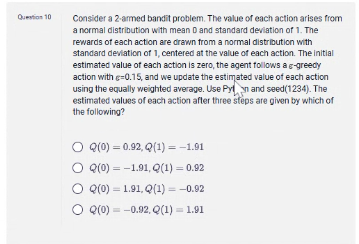

In [8]:
import numpy as np

# Seed for reproducibility
np.random.seed(1234)

# Parameters
n_actions = 2
epsilon = 0.15
steps = 3

# True action values (sampled from N(0,1))
true_values = np.random.normal(0, 1, n_actions)

# Estimated Q-values (initially 0)
Q = np.zeros(n_actions)
counts = np.zeros(n_actions)

print("True action values:", true_values)

# Run 3 steps
for t in range(steps):
    # ε-greedy action selection
    if np.random.rand() < epsilon:
        action = np.random.choice(n_actions)  # explore
    else:
        action = np.argmax(Q)  # exploit
    
    # Get reward from N(true_value, 1)
    reward = np.random.normal(true_values[action], 1)
    
    # Update counts and Q-values (sample average)
    counts[action] += 1
    Q[action] += (1 / counts[action]) * (reward - Q[action])
    
    print(f"Step {t+1}: action={action}, reward={reward:.2f}, Q={Q}")

print("\nFinal estimates:")
print(f"Q(0) = {Q[0]:.2f}, Q(1) = {Q[1]:.2f}")


True action values: [ 0.47143516 -1.19097569]
Step 1: action=0, reward=1.13, Q=[1.1339442 0.       ]
Step 2: action=0, reward=1.15, Q=[1.14031285 0.        ]
Step 3: action=0, reward=0.14, Q=[0.80715135 0.        ]

Final estimates:
Q(0) = 0.81, Q(1) = 0.00


In [10]:
import numpy as np

rng = np.random.RandomState(1234)  # explicit RNG object for reproducibility

def optimal_action(qvalue, eps, rng):
    nactions = qvalue.shape[0]
    action_hat = np.where(qvalue == np.max(qvalue))[0]
    eps_draw = rng.rand()
    chosen = None
    tie_draw = None
    if eps_draw <= eps:
        # explore: choose uniformly using one rand to select bin (lesson style)
        randnum = rng.rand()
        tie_draw = randnum
        for aa in range(nactions):
            if randnum < (aa + 1) / nactions:
                chosen = aa
                break
    elif action_hat.shape[0] > 1:
        # Randomize among ties
        randnum = rng.rand()
        tie_draw = randnum
        for aa in range(action_hat.shape[0]):
            if randnum < (aa + 1) / action_hat.shape[0]:
                chosen = action_hat[aa]
                break
    else:
        chosen = int(np.argmax(qvalue))
    return chosen, eps_draw, tie_draw

def reward_update(action, reward, qvalue_old, alpha):
    qvalue_new = qvalue_old.copy()
    qvalue_new[action] = qvalue_old[action] + alpha * (reward - qvalue_old[action])
    return qvalue_new

# PARAMETERS
n_actions = 2
epsilon = 0.5
steps = 3

# Draw true action values ~ N(0,1)
true_values = rng.normal(0, 1, n_actions)
print("True action values (NMEANS):", true_values)

# Initialize
Q = np.zeros(n_actions)
counts = np.zeros(n_actions, dtype=int)

# Run steps with detailed logging
for t in range(steps):
    aa, eps_draw, tie_draw = optimal_action(Q, epsilon, rng)
    reward = rng.normal(true_values[aa], 1.0)   # reward ~ N(mu_a, 1)
    counts[aa] += 1
    alpha = 1.0 / counts[aa]                    # sample-average update
    Q = reward_update(aa, reward, Q, alpha)
    print(f"Step {t+1}: eps_draw={eps_draw:.12f}, tie_draw={tie_draw}, chosen={aa}, reward={reward:.12f}, counts={counts}, Q={Q}")

print("\nFinal estimated Q-values after 3 steps:")
for i, q in enumerate(Q):
    print(f"Q({i}) = {q:.12f}")

# Compare rounded result to the MC options
rounded = (round(Q[0],2), round(Q[1],2))
print("\nRounded final Qs:", rounded)


True action values (NMEANS): [ 0.47143516 -1.19097569]
Step 1: eps_draw=0.437727739007, tie_draw=0.7853585837137692, chosen=1, reward=-1.911564428071, counts=[0 1], Q=[ 0.         -1.91156443]
Step 2: eps_draw=0.276464255143, tie_draw=0.8018721775350193, chosen=1, reward=-0.303812754399, counts=[0 2], Q=[ 0.         -1.10768859]
Step 3: eps_draw=0.958139353684, tie_draw=None, chosen=0, reward=0.140828343791, counts=[1 2], Q=[ 0.14082834 -1.10768859]

Final estimated Q-values after 3 steps:
Q(0) = 0.140828343791
Q(1) = -1.107688591235

Rounded final Qs: (np.float64(0.14), np.float64(-1.11))


In [34]:
import numpy as np

rng = np.random.RandomState(1234)

def optimal_action(qvalue, eps, rng):
    nactions = qvalue.shape[0]
    action_hat = np.where(qvalue == np.max(qvalue))[0]
    eps_draw = rng.rand()
    chosen = None
    tie_draw = None
    if eps_draw <= eps:
        # explore: choose uniformly using one rand to select bin (lesson style)
        randnum = rng.rand()
        tie_draw = randnum
        for aa in range(nactions):
            if randnum < (aa + 1) / nactions:
                chosen = aa
                break
    elif action_hat.shape[0] > 1:
        # Randomize among ties
        randnum = rng.rand()
        tie_draw = randnum
        for aa in range(action_hat.shape[0]):
            if randnum < (aa + 1) / action_hat.shape[0]:
                chosen = action_hat[aa]
                break
    else:
        chosen = int(np.argmax(qvalue))
    return chosen, eps_draw, tie_draw

def reward_update_const_alpha(action, reward, qvalue_old, alpha):
    qvalue_new = qvalue_old.copy()
    qvalue_new[action] = qvalue_old[action] + alpha * (reward - qvalue_old[action])
    return qvalue_new

# Parameters
n_actions = 2
epsilon = 0.5
steps = 3
alpha = 0.25

# Draw true action values ~ N(0,1)
true_values = rng.normal(0, 1, n_actions)
print("True action values (NMEANS):", true_values)

# Initialize estimates
Q = np.zeros(n_actions)

# Run 3 steps
for t in range(steps):
    aa, eps_draw, tie_draw = optimal_action(Q, epsilon, rng)
    reward = rng.normal(true_values[aa], 1.0)
    Q = reward_update_const_alpha(aa, reward, Q, alpha)
    print(f"Step {t+1}: eps_draw={eps_draw:.12f}, tie_draw={tie_draw}, chosen={aa}, reward={reward:.12f}, Q={Q}")

print("\nFinal Q-values:")
print(f"Q(0) = {Q[0]:.12f}")
print(f"Q(1) = {Q[1]:.12f}")


True action values (NMEANS): [ 0.47143516 -1.19097569]
Step 1: eps_draw=0.437727739007, tie_draw=0.7853585837137692, chosen=1, reward=-1.911564428071, Q=[ 0.         -0.47789111]
Step 2: eps_draw=0.276464255143, tie_draw=0.8018721775350193, chosen=1, reward=-0.303812754399, Q=[ 0.         -0.43437152]
Step 3: eps_draw=0.958139353684, tie_draw=None, chosen=0, reward=0.140828343791, Q=[ 0.03520709 -0.43437152]

Final Q-values:
Q(0) = 0.035207085948
Q(1) = -0.434371518863


In [13]:
old_Q = 4.25
reward = 3.5
alpha = 0.15
new_Q = old_Q + alpha * (reward - old_Q)  # => 4.1375

new_Q

4.1375

In [14]:
import numpy as np

rng = np.random.RandomState(1234)

# Draw true action values ~ N(0,1) for 2 arms
true_values = rng.normal(0, 1, 2)

# Greedy action selection (eps = 0) with lesson-style tie-breaking
eps = 0.0
q = np.zeros(2)
eps_draw = rng.rand()  # consumed as in the lesson code

# Tie-break because both Q are equal (initially zeros)
action = None
action_hat = np.where(q == np.max(q))[0]
if action_hat.shape[0] > 1:
    randnum = rng.rand()  # tie-break random draw
    for aa in range(action_hat.shape[0]):
        if randnum < (aa + 1) / action_hat.shape[0]:
            action = action_hat[aa]
            break
else:
    action = int(np.argmax(q))

# Reward ~ N(true_value[action], 0.5)
reward = rng.normal(loc=true_values[action], scale=0.5)

print("True action values:", true_values)
print("eps_draw (consumed):", eps_draw)
print("tie-break randnum:", randnum)
print("Chosen action:", action)
print("Reward:", reward)


True action values: [ 0.47143516 -1.19097569]
eps_draw (consumed): 0.4377277390071145
tie-break randnum: 0.7853585837137692
Chosen action: 1
Reward: -1.5512700613889703


In [15]:
import numpy as np

rng = np.random.RandomState(1234)

def optimal_action(qvalue, eps, rng):
    nactions = qvalue.shape[0]
    action_hat = np.where(qvalue == np.max(qvalue))[0]
    eps_draw = rng.rand()
    chosen = None
    tie_draw = None
    if eps_draw <= eps:
        # explore: choose uniformly using one rand to select bin (lesson style)
        randnum = rng.rand()
        tie_draw = randnum
        for aa in range(nactions):
            if randnum < (aa + 1) / nactions:
                chosen = aa
                break
    elif action_hat.shape[0] > 1:
        # Randomize among ties
        randnum = rng.rand()
        tie_draw = randnum
        for aa in range(action_hat.shape[0]):
            if randnum < (aa + 1) / action_hat.shape[0]:
                chosen = action_hat[aa]
                break
    else:
        chosen = int(np.argmax(qvalue))
    return chosen, eps_draw, tie_draw

def reward_update_avg(action, reward, qvalue_old, counts):
    qvalue_new = qvalue_old.copy()
    n = counts[action]
    qvalue_new[action] = qvalue_old[action] + (1.0 / n) * (reward - qvalue_old[action])
    return qvalue_new

# Parameters
n_actions = 2
epsilon = 0.15
steps = 3

# Draw true action values ~ N(mean=1, sd=1)
true_values = rng.normal(1.0, 1.0, n_actions)
print("True action values (NMEANS):", true_values)

# Initialize estimates and counters
Q = np.zeros(n_actions)
counts = np.zeros(n_actions, dtype=int)

# Run simulation with logging
for t in range(steps):
    aa, eps_draw, tie_draw = optimal_action(Q, epsilon, rng)
    reward = rng.normal(true_values[aa], 1.0)
    counts[aa] += 1
    Q = reward_update_avg(aa, reward, Q, counts)
    print(f"Step {t+1}: chosen={aa}, reward={reward:.12f}, counts={counts}, Q={Q}")

print("\nFinal Q-values after 3 steps:")
print(f"Q(0) = {Q[0]:.12f}")
print(f"Q(1) = {Q[1]:.12f}")


True action values (NMEANS): [ 1.47143516 -0.19097569]
Step 1: chosen=1, reward=-0.911564428071, counts=[0 1], Q=[ 0.         -0.91156443]
Step 2: chosen=0, reward=2.358598104040, counts=[1 1], Q=[ 2.3585981  -0.91156443]
Step 3: chosen=0, reward=1.487131535847, counts=[2 1], Q=[ 1.92286482 -0.91156443]

Final Q-values after 3 steps:
Q(0) = 1.922864819944
Q(1) = -0.911564428071


In [16]:
import numpy as np

rng = np.random.RandomState(1234)

def optimal_action(qvalue, eps, rng):
    nactions = qvalue.shape[0]
    action_hat = np.where(qvalue == np.max(qvalue))[0]
    eps_draw = rng.rand()
    chosen = None
    tie_draw = None
    if eps_draw <= eps:
        randnum = rng.rand()
        tie_draw = randnum
        for aa in range(nactions):
            if randnum < (aa + 1) / nactions:
                chosen = aa
                break
    elif action_hat.shape[0] > 1:
        randnum = rng.rand()
        tie_draw = randnum
        for aa in range(action_hat.shape[0]):
            if randnum < (aa + 1) / action_hat.shape[0]:
                chosen = action_hat[aa]
                break
    else:
        chosen = int(np.argmax(qvalue))
    return chosen, eps_draw, tie_draw

def reward_update_const_alpha(action, reward, qvalue_old, alpha):
    qvalue_new = qvalue_old.copy()
    qvalue_new[action] = qvalue_old[action] + alpha * (reward - qvalue_old[action])
    return qvalue_new

# Parameters
n_actions = 2
epsilon = 0.05
steps = 3
alpha = 0.25

# Draw true action values ~ N(0,1)
true_values = rng.normal(0.0, 1.0, n_actions)
print("True action values (NMEANS):", true_values)

# Initialize estimates
Q = np.zeros(n_actions)

# Run 3 steps
for t in range(steps):
    aa, eps_draw, tie_draw = optimal_action(Q, epsilon, rng)
    reward = rng.normal(true_values[aa], 1.0)
    Q = reward_update_const_alpha(aa, reward, Q, alpha)
    print(f"Step {t+1}: eps_draw={eps_draw:.12f}, tie_draw={tie_draw}, chosen={aa}, reward={reward:.12f}, Q={Q}")

print("\nFinal Q-values:")
print(f"Q(0) = {Q[0]:.12f}")
print(f"Q(1) = {Q[1]:.12f}")


True action values (NMEANS): [ 0.47143516 -1.19097569]
Step 1: eps_draw=0.437727739007, tie_draw=0.7853585837137692, chosen=1, reward=-1.911564428071, Q=[ 0.         -0.47789111]
Step 2: eps_draw=0.276464255143, tie_draw=None, chosen=0, reward=1.358598104040, Q=[ 0.33964953 -0.47789111]
Step 3: eps_draw=0.801872177535, tie_draw=None, chosen=0, reward=0.487131535847, Q=[ 0.37652003 -0.47789111]

Final Q-values:
Q(0) = 0.376520028469
Q(1) = -0.477891107018


In [17]:
import numpy as np

rng = np.random.RandomState(1234)

def optimal_action(qvalue, eps, rng):
    nactions = qvalue.shape[0]
    action_hat = np.where(qvalue == np.max(qvalue))[0]
    eps_draw = rng.rand()  # consume RNG as in lesson code
    chosen = None
    tie_draw = None
    if eps_draw <= eps:
        randnum = rng.rand()
        tie_draw = randnum
        for aa in range(nactions):
            if randnum < (aa + 1) / nactions:
                chosen = aa
                break
    elif action_hat.shape[0] > 1:
        randnum = rng.rand()
        tie_draw = randnum
        for aa in range(action_hat.shape[0]):
            if randnum < (aa + 1) / action_hat.shape[0]:
                chosen = action_hat[aa]
                break
    else:
        chosen = int(np.argmax(qvalue))
    return chosen, eps_draw, tie_draw

def reward_update_avg(action, reward, qvalue_old, counts):
    qvalue_new = qvalue_old.copy()
    n = counts[action]
    qvalue_new[action] = qvalue_old[action] + (1.0 / n) * (reward - qvalue_old[action])
    return qvalue_new

# Parameters
n_actions = 2
epsilon = 0.0  # greedy
steps = 3
reward_std = 1.5

# Draw true action values ~ N(0,1)
true_values = rng.normal(0.0, 1.0, n_actions)
print("True action values (NMEANS):", true_values)

# Initialize estimates and counters
Q = np.zeros(n_actions)
counts = np.zeros(n_actions, dtype=int)

# Run simulation with logging
for t in range(steps):
    aa, eps_draw, tie_draw = optimal_action(Q, epsilon, rng)
    reward = rng.normal(true_values[aa], reward_std)
    counts[aa] += 1
    Q = reward_update_avg(aa, reward, Q, counts)
    print(f"Step {t+1}: eps_draw={eps_draw:.12f}, tie_draw={tie_draw}, chosen={aa}, reward={reward:.12f}, counts={counts}, Q={Q}")

print("\nFinal estimated Q-values after 3 steps:")
for i, q in enumerate(Q):
    print(f"Q({i}) = {q:.12f}")


True action values (NMEANS): [ 0.47143516 -1.19097569]
Step 1: eps_draw=0.437727739007, tie_draw=0.7853585837137692, chosen=1, reward=-2.271858794754, counts=[0 1], Q=[ 0.         -2.27185879]
Step 2: eps_draw=0.276464255143, tie_draw=None, chosen=0, reward=1.802179574194, counts=[1 1], Q=[ 1.80217957 -2.27185879]
Step 3: eps_draw=0.801872177535, tie_draw=None, chosen=0, reward=0.494979721904, counts=[2 1], Q=[ 1.14857965 -2.27185879]

Final estimated Q-values after 3 steps:
Q(0) = 1.148579648049
Q(1) = -2.271858794754


In [37]:
import numpy as np

rng = np.random.RandomState(1234)

def optimal_action(qvalue, eps, rng):
    nactions = qvalue.shape[0]
    action_hat = np.where(qvalue == np.max(qvalue))[0]
    eps_draw = rng.rand()  # consumed just like in the lesson code
    chosen = None
    tie_draw = None
    if eps_draw <= eps:
        randnum = rng.rand()
        tie_draw = randnum
        for aa in range(nactions):
            if randnum < (aa + 1) / nactions:
                chosen = aa
                break
    elif action_hat.shape[0] > 1:
        randnum = rng.rand()
        tie_draw = randnum
        for aa in range(action_hat.shape[0]):
            if randnum < (aa + 1) / action_hat.shape[0]:
                chosen = action_hat[aa]
                break
    else:
        chosen = int(np.argmax(qvalue))
    return chosen, eps_draw, tie_draw

def reward_update_const_alpha(action, reward, qvalue_old, alpha):
    qvalue_new = qvalue_old.copy()
    qvalue_new[action] = qvalue_old[action] + alpha * (reward - qvalue_old[action])
    return qvalue_new

# Parameters
n_actions = 2
epsilon = 0.25  # greedy
steps = 3
alpha = 0.25

# Draw true action values ~ N(0,1)
true_values = rng.normal(0.0, 1.0, n_actions)
print("True action values (NMEANS):", true_values)

# Initialize estimates
Q = np.zeros(n_actions)

# Run 3 steps
for t in range(steps):
    aa, eps_draw, tie_draw = optimal_action(Q, epsilon, rng)
    reward = rng.normal(true_values[aa], 1.0)
    Q = reward_update_const_alpha(aa, reward, Q, alpha)
    print(f"Step {t+1}: eps_draw={eps_draw:.12f}, tie_draw={tie_draw}, chosen={aa}, reward={reward:.12f}, Q={Q}")

print("\nFinal Q-values:")
print(f"Q(0) = {Q[0]:.12f}")
print(f"Q(1) = {Q[1]:.12f}")


True action values (NMEANS): [ 0.47143516 -1.19097569]
Step 1: eps_draw=0.437727739007, tie_draw=0.7853585837137692, chosen=1, reward=-1.911564428071, Q=[ 0.         -0.47789111]
Step 2: eps_draw=0.276464255143, tie_draw=None, chosen=0, reward=1.358598104040, Q=[ 0.33964953 -0.47789111]
Step 3: eps_draw=0.801872177535, tie_draw=None, chosen=0, reward=0.487131535847, Q=[ 0.37652003 -0.47789111]

Final Q-values:
Q(0) = 0.376520028469
Q(1) = -0.477891107018


In [28]:
import numpy as np

rng = np.random.RandomState(1234)

# Draw true action values ~ N(0,1)
true_values = rng.normal(0.0, 2.0, 2)

# Greedy tie-breaking as used in the lessons
q = np.zeros(2)
eps = 0.0
_ = rng.rand()                 # consume RNG for eps-check (lesson style)
# tie-break because both Q are equal
randnum = rng.rand()
chosen = None
action_hat = np.where(q == np.max(q))[0]
for aa in range(action_hat.shape[0]):
    if randnum < (aa + 1) / action_hat.shape[0]:
        chosen = action_hat[aa]
        break

# reward ~ N(true_value[chosen], 0.5)
reward = rng.normal(loc=true_values[chosen], scale=2)

print("True values:", true_values)
print("Tie-break rand:", randnum)
print("Chosen action:", chosen)
print("Reward:", reward)


True values: [ 0.94287033 -2.38195139]
Tie-break rand: 0.7853585837137692
Chosen action: 1
Reward: -3.823128856142952


In [39]:
# Actions and rewards sequence
actions = [1, 0, 1, 1, 0]
rewards = [1, 4, -5, 3, 2]

# Initialize values and counters
Q = {0: 0.0, 1: 0.0}
counts = {0: 0, 1: 0}

# Update using sample average method
for a, r in zip(actions, rewards):
    counts[a] += 1
    # Incremental update formula for sample average
    Q[a] = Q[a] + (1 / counts[a]) * (r - Q[a])

print("Final estimated values:")
print(f"Q(0) = {Q[0]}")
print(f"Q(1) = {Q[1]}")


Final estimated values:
Q(0) = 3.0
Q(1) = -0.3333333333333335


In [21]:
import numpy as np

# Seed for reproducibility
np.random.seed(1234)

# Parameters
n_actions = 2
alpha = 0.75
steps = 3

# True action values ~ N(0,1)
true_values = np.random.normal(0, 1, n_actions)

# Initial estimates
Q = np.zeros(n_actions)

print("True action values:", true_values)

# Simulation
for t in range(steps):
    # Greedy action selection
    action = np.argmax(Q)
    
    # Reward ~ N(true_value[action], 1)
    reward = np.random.normal(true_values[action], 1)
    
    # Update estimate
    Q[action] = Q[action] + alpha * (reward - Q[action])
    
    print(f"Step {t+1}: action={action}, reward={reward:.2f}, Q={Q}")

print("\nFinal Estimates:")
print(f"Q(0) = {Q[0]:.2f}, Q(1) = {Q[1]:.2f}")


True action values: [ 0.47143516 -1.19097569]
Step 1: action=0, reward=1.90, Q=[1.4281066 0.       ]
Step 2: action=0, reward=0.16, Q=[0.4761141 0.       ]
Step 3: action=0, reward=-0.25, Q=[-0.06783665  0.        ]

Final Estimates:
Q(0) = -0.07, Q(1) = 0.00


In [23]:
import numpy as np

# Set seed for reproducibility
np.random.seed(1234)

# Parameters
n_actions = 2
epsilon = 0.05
n_steps = 3

# True action values (sampled from N(0,1))
true_values = np.random.normal(0, 1, n_actions)

# Initial estimates
Q = np.zeros(n_actions)
N = np.zeros(n_actions)  # count of actions taken

# Run the bandit process
for t in range(n_steps):
    # ε-greedy action selection
    if np.random.rand() < epsilon:
        action = np.random.randint(n_actions)  # explore
    else:
        action = np.argmax(Q)  # exploit
    
    # Reward sampled from N(true_value, 1)
    reward = np.random.normal(true_values[action], 1)
    
    # Update counts
    N[action] += 1
    
    # Sample-average update rule
    Q[action] += (reward - Q[action]) / N[action]

print(f"Final estimates after {n_steps} steps:")
print(f"Q(0) = {Q[0]:.2f}, Q(1) = {Q[1]:.2f}")


Final estimates after 3 steps:
Q(0) = 0.81, Q(1) = 0.00


In [24]:
import numpy as np

rng = np.random.RandomState(1234)

def select_action(qvalue, epsilon, rng):
    if rng.rand() < epsilon:
        # explore
        return rng.randint(len(qvalue))
    else:
        # exploit (with random tie-breaks)
        best_actions = np.flatnonzero(qvalue == qvalue.max())
        return rng.choice(best_actions)

def update_q(action, reward, qvalues, counts):
    counts[action] += 1
    qvalues[action] += (reward - qvalues[action]) / counts[action]
    return qvalues

# Parameters
n_actions = 2
epsilon = 0.15
steps = 3

true_values = rng.normal(1.0, 1.0, n_actions)
print("True action values:", true_values)

Q = np.zeros(n_actions)
counts = np.zeros(n_actions, dtype=int)

for t in range(steps):
    a = select_action(Q, epsilon, rng)
    reward = rng.normal(true_values[a], 1.0)
    Q = update_q(a, reward, Q, counts)
    print(f"Step {t+1}: action={a}, reward={reward:.4f}, counts={counts}, Q={Q}")

print("\nFinal Q-values:")
for i, q in enumerate(Q):
    print(f"Q({i}) = {q:.4f}")


True action values: [ 1.47143516 -0.19097569]
Step 1: action=0, reward=1.9828, counts=[1 0], Q=[1.98275082 0.        ]
Step 2: action=0, reward=1.8561, counts=[2 0], Q=[1.91944426 0.        ]
Step 3: action=0, reward=1.0726, counts=[3 0], Q=[1.63715757 0.        ]

Final Q-values:
Q(0) = 1.6372
Q(1) = 0.0000


In [25]:
# Parameters
Q_old = -1.4   # previous estimate
R = 0.5        # reward
alpha = 0.05   # step-size parameter

# Update rule
Q_new = Q_old + alpha * (R - Q_old)

print("Updated value of action a:", Q_new)


Updated value of action a: -1.305


In [26]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(1234)

# Number of actions
k = 2

# True action values ~ N(0, 2)
true_values = np.random.normal(0, 2, k)

# Initial estimated values
Q = np.zeros(k)

# Greedy action selection (tie broken randomly if needed)
max_actions = np.where(Q == Q.max())[0]
if len(max_actions) > 1:
    action = np.random.choice(max_actions)
else:
    action = max_actions[0]

# Reward from N(true_value[action], 2)
reward = np.random.normal(true_values[action], 2)

print("True values:", true_values)
print("Chosen action:", action)
print("Reward:", reward)


True values: [ 0.94287033 -2.38195139]
Chosen action: 0
Reward: 3.6402581339437274


In [29]:
import numpy as np

# Fix seed
np.random.seed(1234)

# Number of arms
k = 2

# True action values ~ Normal(0, 2)
true_values = np.random.normal(0, 2, k)

# Initial estimates
Q = np.zeros(k)

# Since both estimates are equal, greedy = random choice
action = np.random.choice(np.arange(k))

# Reward ~ Normal(true_value[action], 2)
reward = np.random.normal(true_values[action], 2)

print("True values:", true_values)
print("Chosen action:", action)
print("Reward:", reward)


True values: [ 0.94287033 -2.38195139]
Chosen action: 0
Reward: 3.6402581339437274


In [33]:
import numpy as np

rng = np.random.RandomState(1234)

def optimal_action_lesson_style(qvalue, eps, rng):
    nactions = qvalue.shape[0]
    action_hat = np.where(qvalue == np.max(qvalue))[0]
    eps_draw = rng.rand()
    chosen = None
    tie_draw = None
    if eps_draw <= eps:
        randnum = rng.rand()
        tie_draw = randnum
        for aa in range(nactions):
            if randnum < (aa + 1) / nactions:
                chosen = aa
                break
    elif action_hat.shape[0] > 1:
        randnum = rng.rand()
        tie_draw = randnum
        for aa in range(action_hat.shape[0]):
            if randnum < (aa + 1) / action_hat.shape[0]:
                chosen = action_hat[aa]
                break
    else:
        chosen = int(np.argmax(qvalue))
    return chosen, eps_draw, tie_draw

# Parameters
n_actions = 2
epsilon = 0.0  # greedy
steps = 3

# True action values ~ N(0, 0.5)
true_values = rng.normal(0.0, 0.5, n_actions)
print("True action values (NMEANS):", true_values)

# Initialize Q and counts
Q = np.zeros(n_actions)
counts = np.zeros(n_actions, dtype=int)

for t in range(steps):
    aa, eps_draw, tie_draw = optimal_action_lesson_style(Q, epsilon, rng)
    reward = rng.normal(loc=true_values[aa], scale=1.0)
    counts[aa] += 1
    Q[aa] += (reward - Q[aa]) / counts[aa]  # sample-average update
    print(f"Step {t+1}: chosen={aa}, reward={reward:.12f}, counts={counts}, Q={Q}")

print("\nFinal Q-values:")
print(f"Q(0) = {Q[0]:.12f}, Q(1) = {Q[1]:.12f}")


True action values (NMEANS): [ 0.23571758 -0.59548785]
Step 1: chosen=1, reward=-1.316076580718, counts=[0 1], Q=[ 0.         -1.31607658]
Step 2: chosen=0, reward=1.122880522174, counts=[1 1], Q=[ 1.12288052 -1.31607658]
Step 3: chosen=0, reward=0.251413953981, counts=[2 1], Q=[ 0.68714724 -1.31607658]

Final Q-values:
Q(0) = 0.687147238077, Q(1) = -1.316076580718


In [36]:
import numpy as np

np.random.seed(1234)

# Step 1: True action values (sampled once for environment)
true_values = np.random.normal(0, 1, 2)

# Initial estimates
Q = [0, 0]

# Greedy choice (tie -> choose a=0)
a = np.argmax(Q)

# Reward from distribution N(true_value[a], 2)
r = np.random.normal(true_values[a], 2)

print("Action:", a, "Reward:", round(r, 2))


Action: 0 Reward: 3.34
